In [1]:
from skimage.data import cells3d
from skimage.io import imread, imshow
import pyclesperanto_prototype as cle
import numpy as np
cle.get_device()

<Intel(R) UHD Graphics on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

In [2]:
image = cells3d()

image.shape


(60, 2, 256, 256)

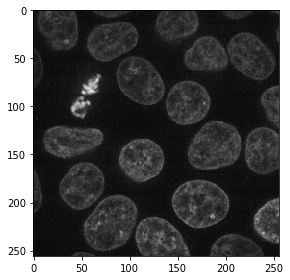

In [3]:
nuclei = image[30, 1]
imshow(nuclei)

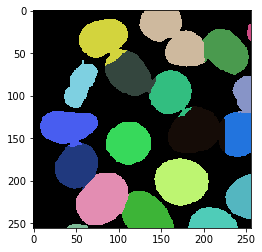

In [4]:
nuclei_labels = cle.voronoi_otsu_labeling(nuclei, outline_sigma=2, spot_sigma=10)
cle.imshow(nuclei_labels, labels=True)

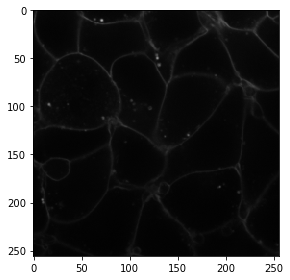

In [5]:
membranes = image[30, 0]
imshow(membranes)

0.0
43815.0


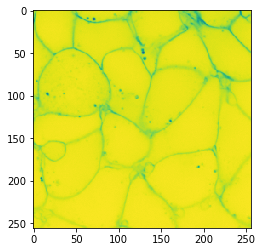

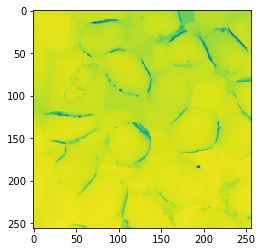

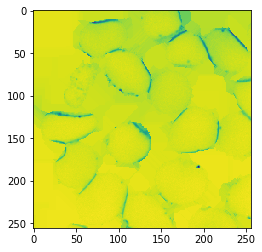

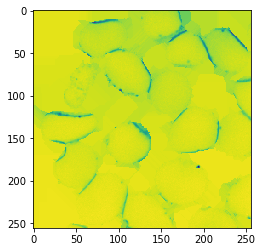

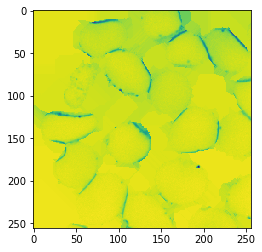

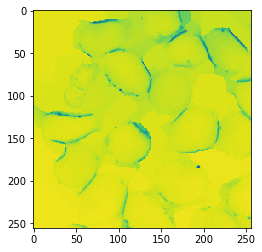

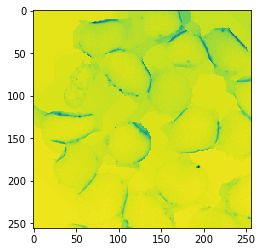

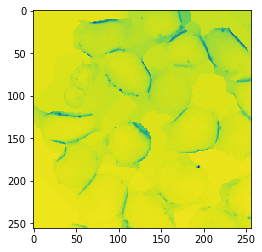

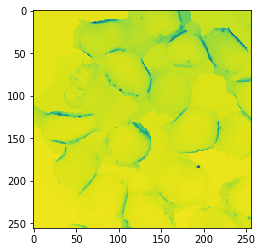

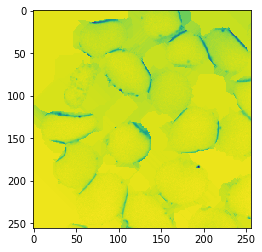

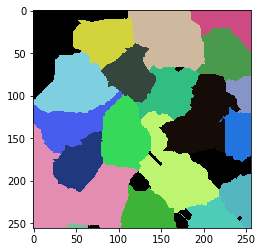

In [6]:
membrane_labels = cle.watershed(membranes, nuclei_labels)

cle.imshow(membrane_labels, labels=True)

In [7]:
membrane_labels.min()

0.0

In [8]:
membrane_labels.max()

19.0

## Comparison with scikit-image watershed
A well-known implementation of the [watershed algorithm](https://en.wikipedia.org/wiki/Watershed_(image_processing)) also exists in scikit-image: [watershed](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.watershed).

We should compare our results to the results produced by scikit-image's watershed:

In [9]:
from skimage.segmentation import watershed
sk_membrane_labels = watershed(membranes, np.asarray(nuclei_labels))
#cle.imshow(cle.push(sk_membrane_labels), labels=True)

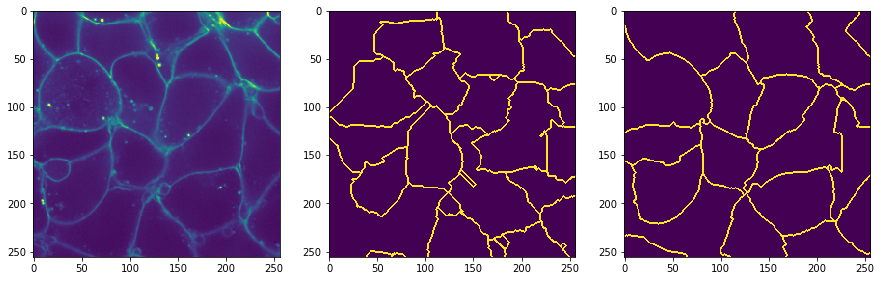

In [10]:
cle_edges = cle.detect_label_edges(membrane_labels)
sk_edges = cle.detect_label_edges(sk_membrane_labels)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,15))
cle.imshow(membranes, min_display_intensity=0, max_display_intensity=20000, plot=axs[0])
cle.imshow(cle_edges, plot=axs[1])
cle.imshow(sk_edges, plot=axs[2])